# 🌳 Árboles de Regresión con Representación por Celdas

En este cuaderno exploramos cómo los **árboles de decisión para regresión** pueden representarse visualmente como **celdas o particiones** en el espacio de los datos.  
La idea central es mostrar cómo el modelo no paramétrico **divide el dominio de la variable explicativa (X)** en intervalos, y dentro de cada uno asigna una predicción constante para la variable respuesta (Y).

---

## 📌 Objetivos principales
- Comprender cómo los **árboles de regresión** particionan el espacio de datos.  
- Visualizar gráficamente la segmentación en forma de **celdas o bloques horizontales**.  
- Comparar los resultados frente a otros enfoques paramétricos.  
- Experimentar con la profundidad del árbol (`max_depth`) y cómo impacta en la complejidad del modelo.

---

## 🛠️ Herramientas utilizadas
- **Python 3**  
- **scikit-learn** → para entrenar los árboles de regresión.  
- **matplotlib / seaborn** → para visualización.  
- **numpy / pandas** → para manejo de datos.  

---

## 🚀 Flujo de trabajo en el notebook
1. Generación y exploración de los datos de entrada.  
2. Entrenamiento de un **árbol de regresión** con distintos hiperparámetros.  
3. Representación de las **celdas de predicción** en los gráficos.  
4. Comparación visual entre los datos originales y los valores predichos.  
5. Discusión sobre ventajas, limitaciones y posibles mejoras (poda, tuning de parámetros).  

---

## 📚 Qué aprenderás
- La diferencia entre **modelos paramétricos** y **no paramétricos**.  
- Cómo funciona un árbol al segmentar los datos en regiones más homogéneas.  
- La interpretación visual de las predicciones como **bloques escalonados**.  
- La relación entre la profundidad del árbol y el sobreajuste (overfitting).  


In [1]:
'''
Uso de árboles de decisión como Regresor.

Vamos a hacer un modelo para un problema con pocos datos.
dOCUMENTACIÓN OFICIAL SKLEARN DECISION TREE
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
'''

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')


In [2]:
# cargamos los datos en un df, cambiando separador que no es 'coma' sino 'tab'

data = pd.read_csv('https://github.com/palasatenea66/DATASETS/raw/main/datos_V_I.txt', sep = '\t')

In [3]:
print(data.shape)
print(data.columns)
data.head(12)

(12, 16)
Index(['Vcelda1', 'Icelda1', 'Vcelda2', 'Icelda2', 'Vcelda3', 'Icelda3',
       'Vcelda4', 'Icelda4', 'Vcelda5', 'Icelda5', 'Vcelda6', 'Icelda6',
       'Vcelda7', 'Icelda7', 'Vcelda8', 'Icelda8'],
      dtype='object')


,Vcelda1,Icelda1,Vcelda2,Icelda2,Vcelda3,Icelda3,Vcelda4,Icelda4,Vcelda5,Icelda5,Vcelda6,Icelda6,Vcelda7,Icelda7,Vcelda8,Icelda8
0,0.0,5.46,0.0,5.501,0.0,5.50,0.0,5.44,0.0,5.39,0.0,5.45,0.0,5.51,0.0,5.30
1,2.3,5.43,0.9,5.490,0.6,5.46,0.5,5.44,2.6,5.39,0.7,5.45,0.6,5.48,2.9,5.28
2,6.8,5.42,2.7,5.490,2.1,5.45,2.9,5.43,7.2,5.38,2.0,5.44,2.6,5.47,6.5,5.27
3,11.0,5.32,7.2,5.490,8.2,5.42,6.6,5.42,11.4,5.30,7.3,5.43,9.6,5.46,8.4,5.26
4,16.5,4.44,13.8,5.370,15.7,4.89,11.7,5.40,15.6,4.73,15.5,4.86,16.0,4.67,14.0,5.18
5,17.7,3.45,17.4,4.070,18.1,3.15,15.1,5.00,17.5,3.50,17.1,3.85,17.3,3.66,15.9,4.84
6,18.3,2.80,18.3,3.130,18.6,2.46,17.3,3.56,18.2,2.72,18.1,2.80,18.0,2.86,16.7,4.50
7,18.7,2.31,18.8,2.590,18.9,2.10,18.1,2.68,18.6,2.26,18.6,2.09,18.4,2.35,17.8,3.64
8,18.9,1.96,19.1,2.050,19.1,1.83,18.6,2.07,18.9,1.90,18.8,1.81,18.6,2.13,18.5,2.94
9,19.1,1.73,19.3,1.810,19.2,1.63,18.8,1.81,19.0,1.70,18.9,1.68,18.8,1.79,19.3,1.89


In [4]:
# graficaremos las mediciones

def graficar_x_y(x, y, color, celda):
    '''Dados valores x e y, grafica dichos puntos '''
    plt.scatter(x, y, c = color)
    plt.xlabel('Voltaje(V)')
    plt.ylabel('Corriente(A)')
    plt.title(f'Curva característica Corriente vs Voltaje {celda}')
    plt.show()
    plt.close()



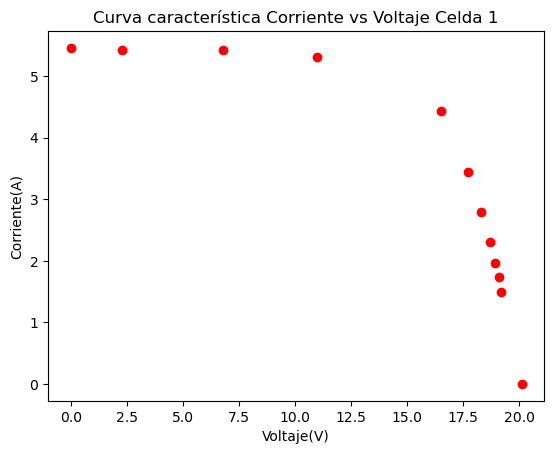

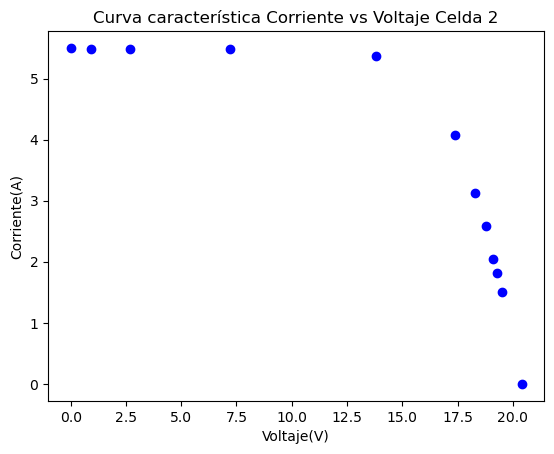

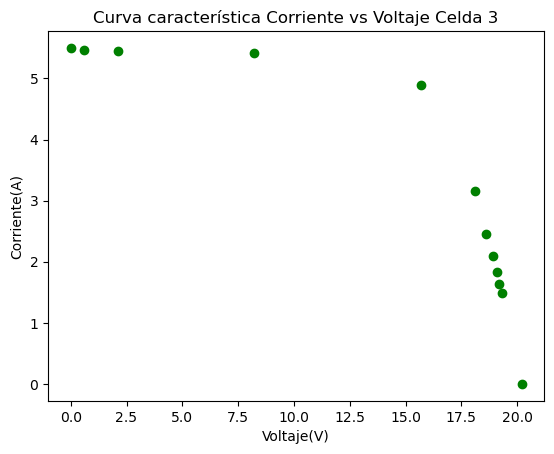

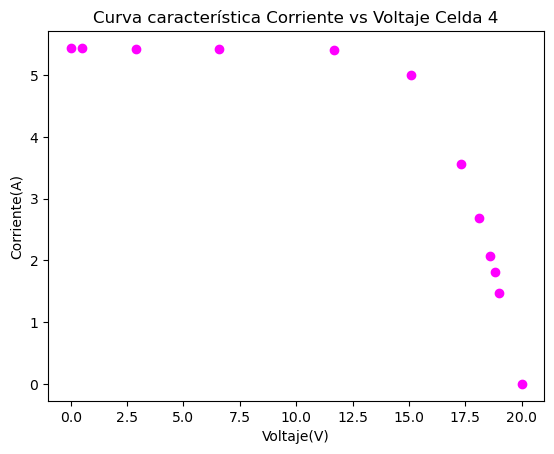

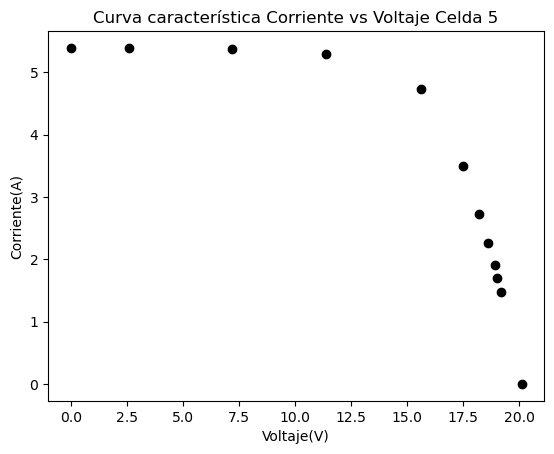

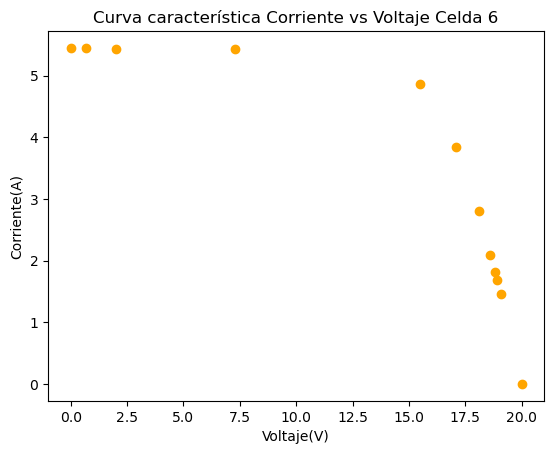

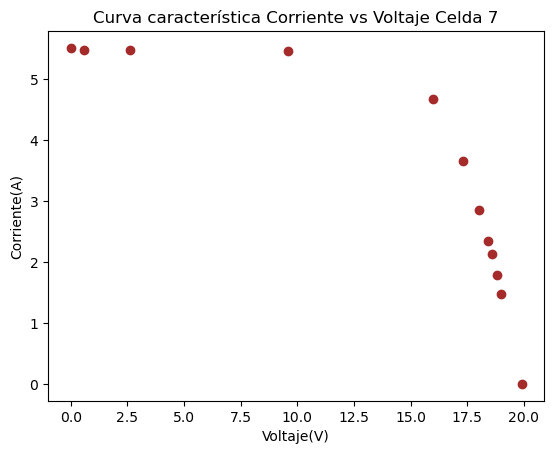

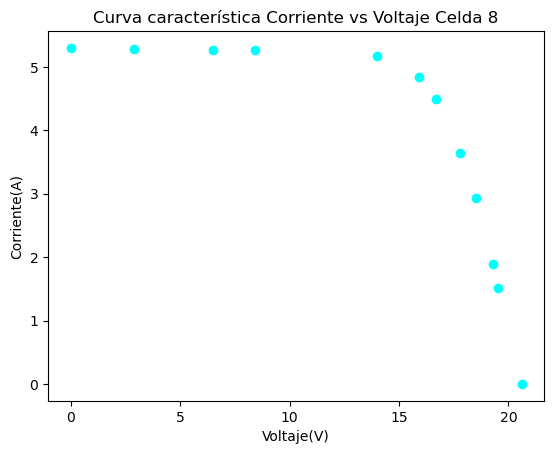

In [5]:
colores=['red', 'blue', 'green', 'magenta', 'black', 'orange', 'brown', 'cyan']

for i, color in enumerate(colores):
    graficar_x_y(data[f'Vcelda{i+1}'], data[f'Icelda{i+1}'], color, f'Celda {i+1}')

In [ ]:
# 🌳 Ahora ponemos a trabajar al arbolito...
# Usamos DecisionTreeRegressor(random_state=16) para asegurar reproducibilidad.
# La idea: ajustar un árbol de regresión sobre los datos de una celda,
# graficar la predicción y analizar el desempeño del modelo.

def regresion_arbol(x, y, color, celda):
    """
    📝 Función: regresion_arbol
    ----------------------------------
    - Ajusta un árbol de regresión sobre los datos de entrada (x, y).
    - Muestra las predicciones del modelo en un rango definido.
    - Grafica los datos reales, la predicción escalonada del árbol y dos puntos de prueba.
    - Calcula la precisión del modelo (score de R^2).
    - Dibuja el esquema del árbol entrenado.

    Parámetros:
    -----------
    x      : Serie (columna independiente, por ej. voltaje)
    y      : Serie (columna dependiente, por ej. corriente)
    color  : Color usado en las gráficas
    celda  : Nombre/etiqueta de la celda analizada
    """

    # 📌 Paso 1: Instanciamos el modelo de árbol
    arbol = DecisionTreeRegressor(random_state=16)

    # 📌 Paso 2: Entrenamos el modelo
    # .to_frame() convierte la serie en DataFrame de 1 columna
    x_df = x.to_frame(name=celda)
    arbol.fit(x_df, y)

    # 📌 Paso 3: Pedimos predicciones puntuales para valores de prueba
    x1 = np.array([5.]).reshape(-1, 1)
    y1 = arbol.predict(x1)
    x2 = np.array([15.]).reshape(-1, 1)
    y2 = arbol.predict(x2)

    # 📌 Paso 4: Creamos un rango continuo de X para graficar
    x_vect = np.arange(0.0, 20.5, 0.01)         # vector numpy entre 0 y 20
    x_graf = x_vect.reshape((len(x_vect), 1))   # reshape para que sea (n,1)

    # 📌 Paso 5: Gráfico principal
    plt.figure(dpi=150)
    plt.scatter(x, y, c=color, label="Datos reales")
    plt.plot(x_graf, arbol.predict(x_graf), color=color, label="Predicción árbol")
    plt.plot(x1, y1, color='lime', marker='x', markersize=10, label="Test point (x=5)")
    plt.plot(x2, y2, color='lime', marker='x', markersize=10, label="Test point (x=15)")
    plt.title(f"🌳 Regresión Árbol de Decisión - Celda {celda}")
    plt.xlabel("V (voltaje en voltios)")
    plt.ylabel("I (corriente en amperes)")
    plt.legend()
    #plt.savefig(f"celda{celda}.png", dpi=300)  # opcional: guardar gráfico
    plt.show()
    plt.close()

    # 📌 Paso 6: Métricas de precisión
    print("\n\n")
    print(f"📊 Precisión sobre valores REALES: {arbol.score(x_df, y)}")
    print(f"📊 Precisión sobre valores PREDICCIÓN: {arbol.score(x_graf, arbol.predict(x_graf))}")
    print("\n\n")

    # 📌 Paso 7: Visualización del árbol entrenado
    plt.figure(dpi=200)
    plot_tree(arbol, filled=True, feature_names=[celda], rounded=True)
    plt.title(f"📐 Esquema del Árbol - Celda {celda}")
    plt.show()
    plt.close()

    return

"\nclass sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best',\nmax_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\n max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,\n ccp_alpha=0.0)\n\nsklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None,\nclass_names=None, label='all', filled=False, impurity=True, node_ids=False,\nproportion=False, rounded=False, precision=3, ax=None, fontsize=None)\n\nmatplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None,\nedgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>,\nclear=False, **kwargs)\n"

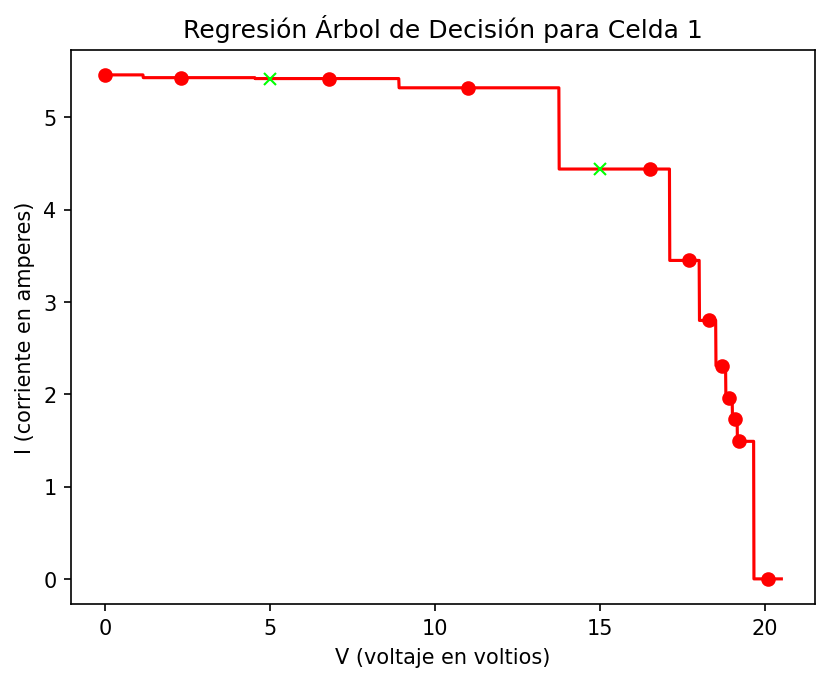







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








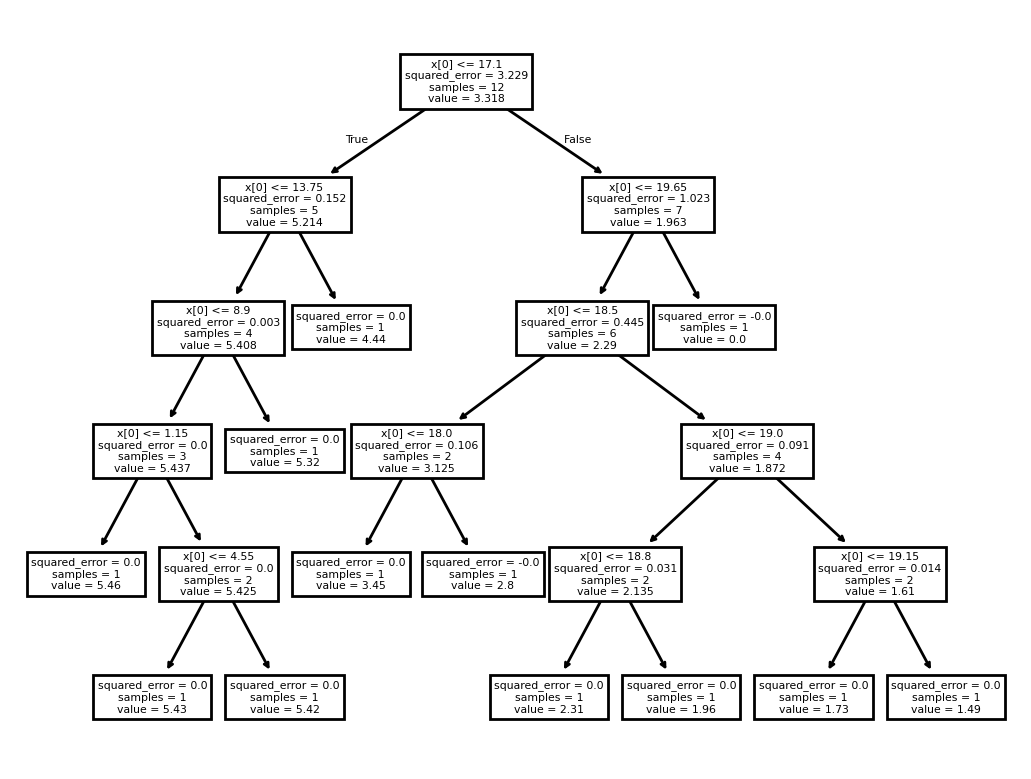

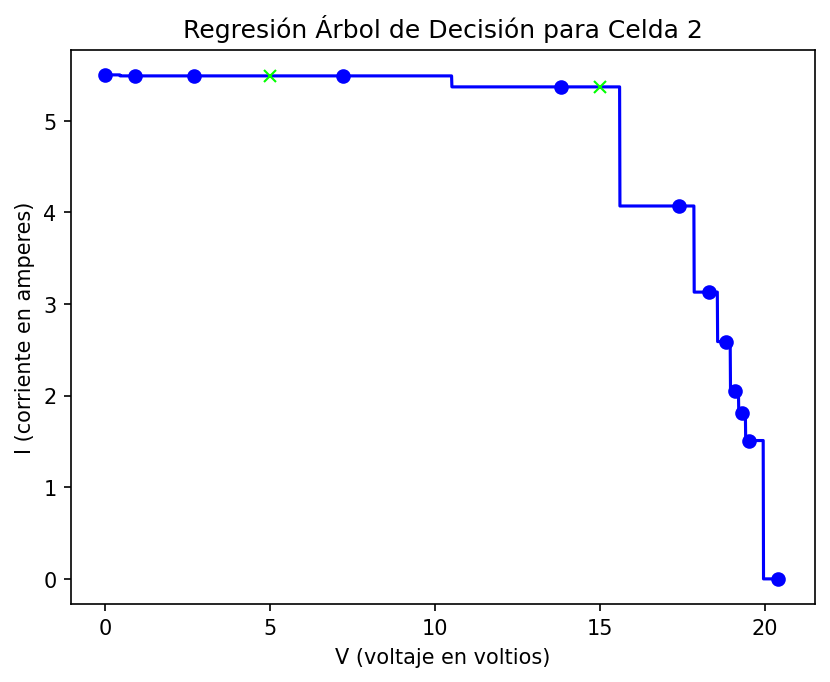







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








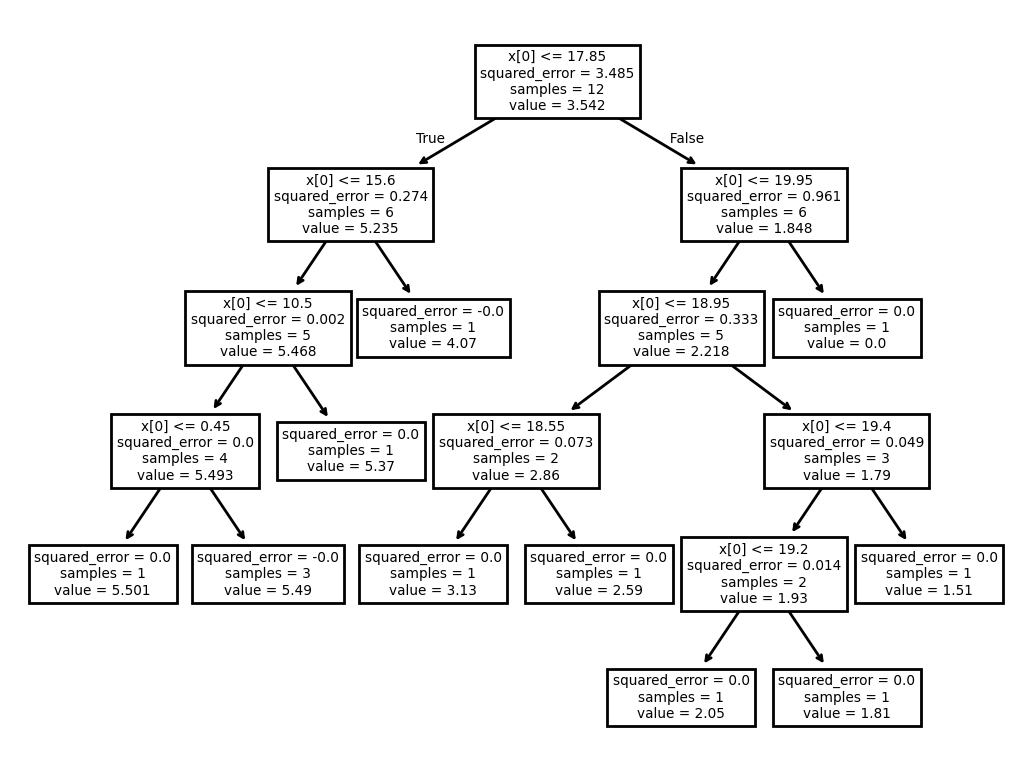

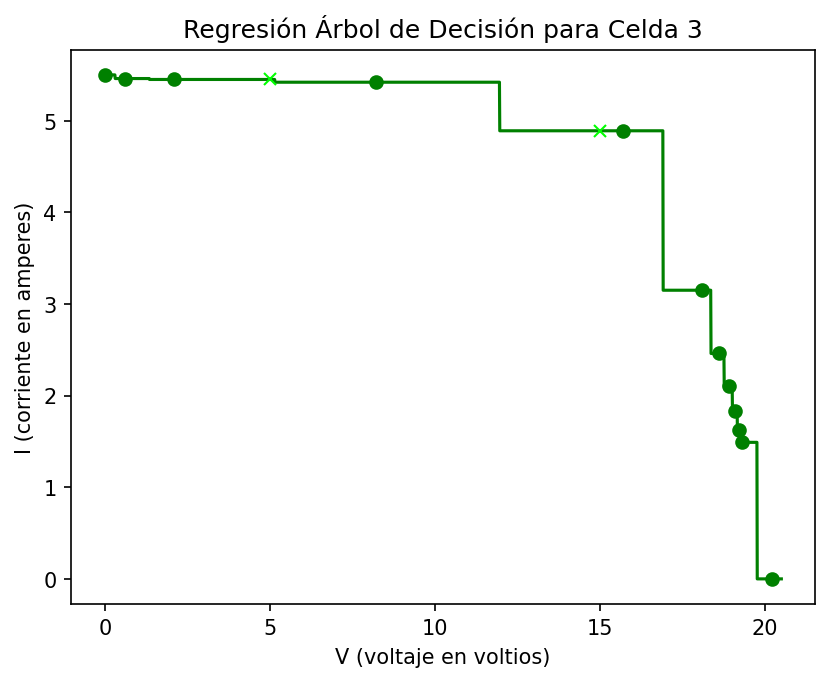







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








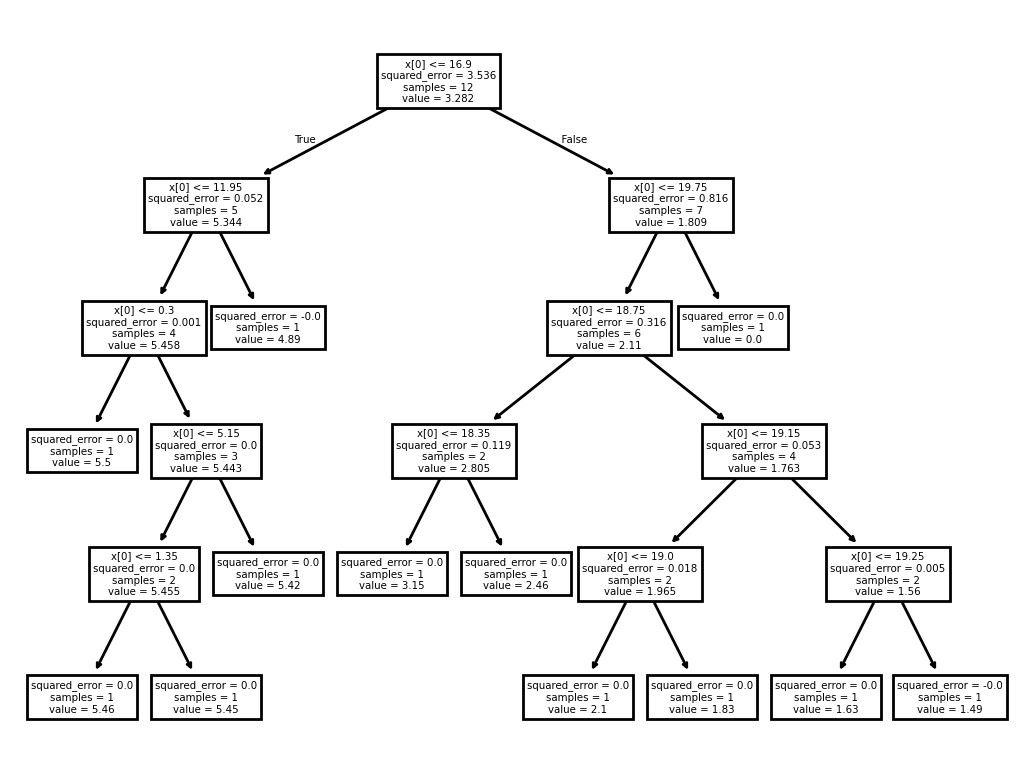

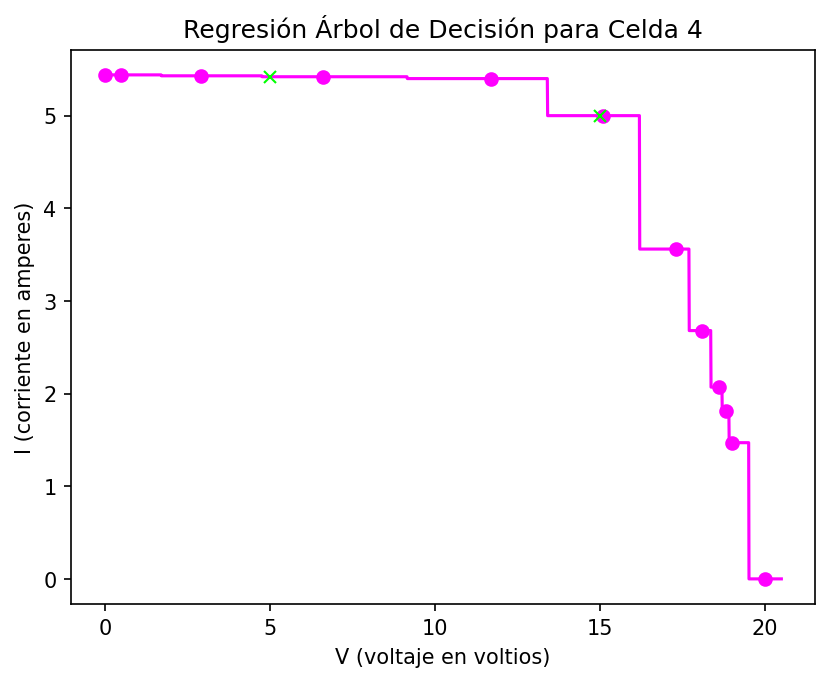







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








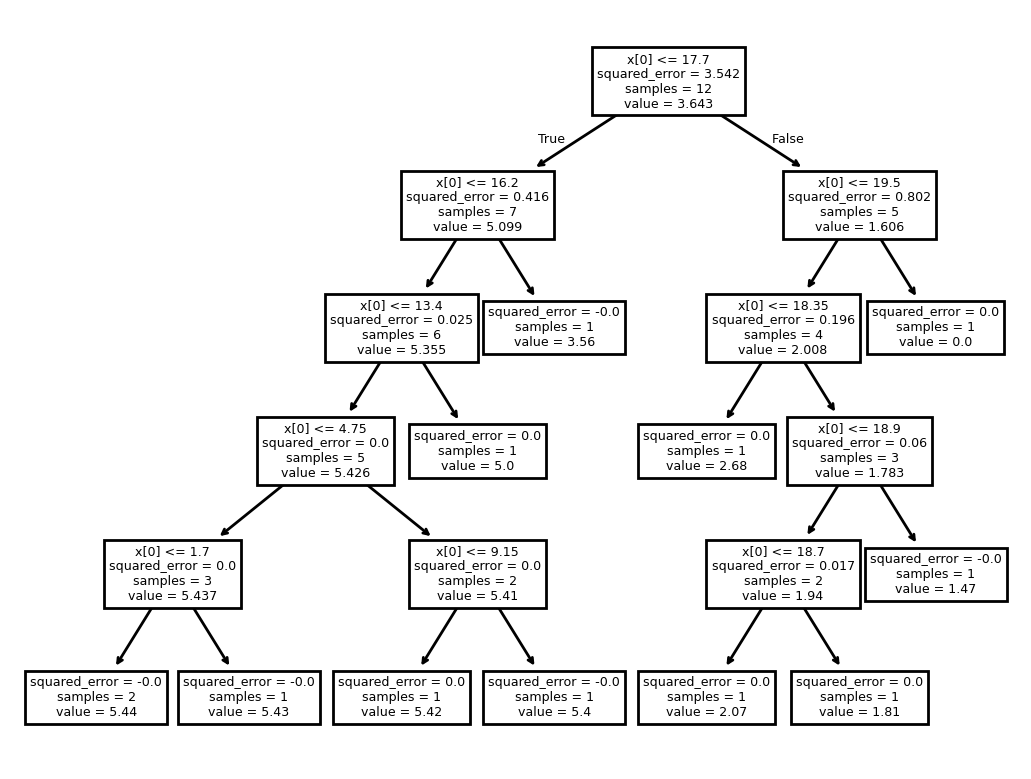

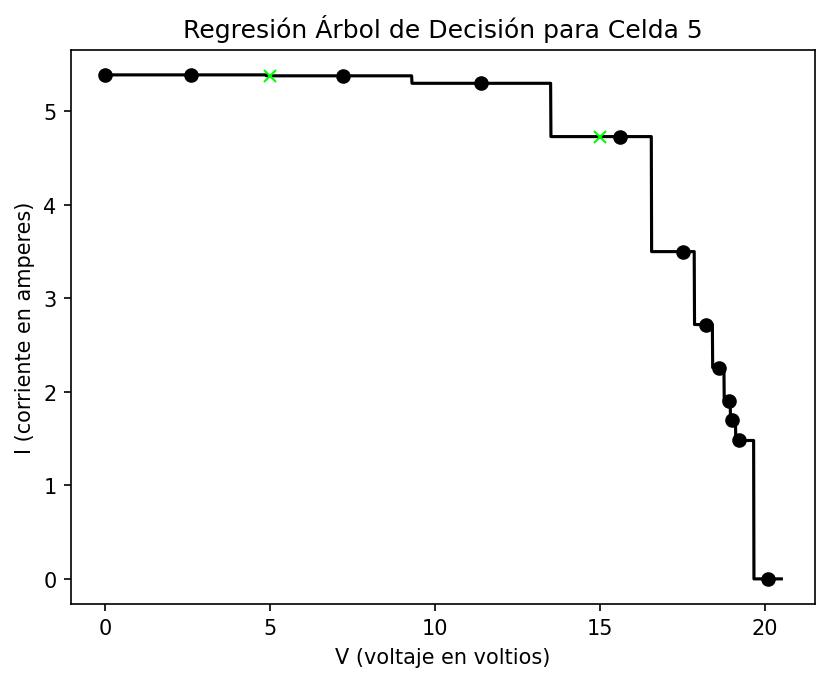







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








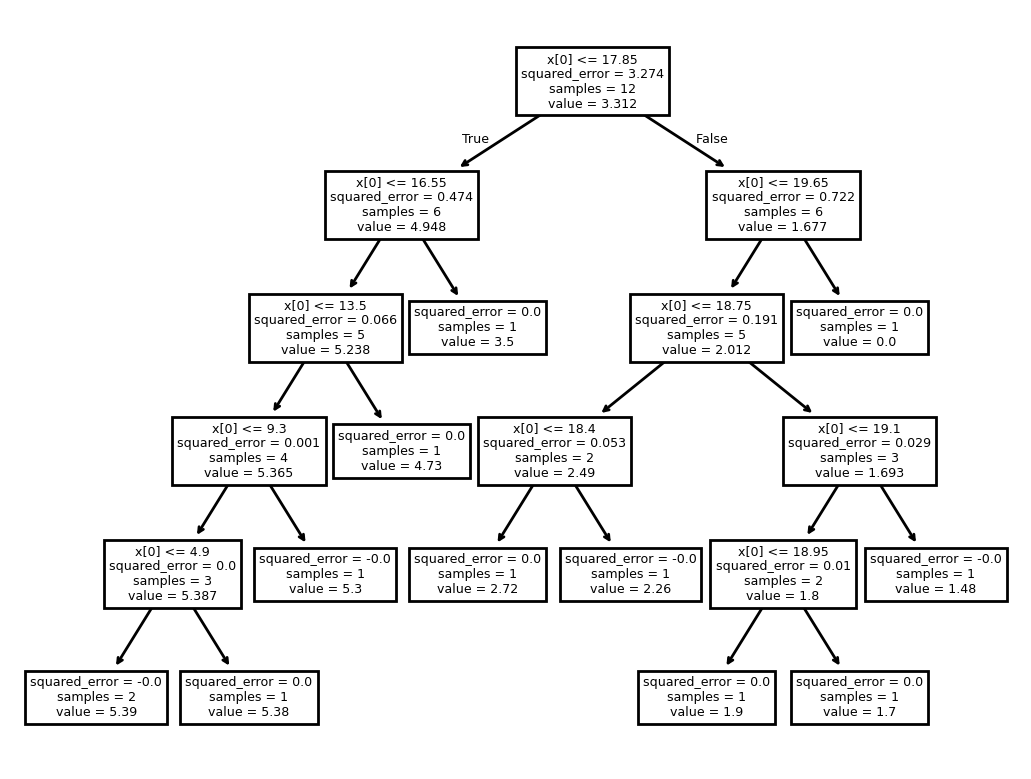

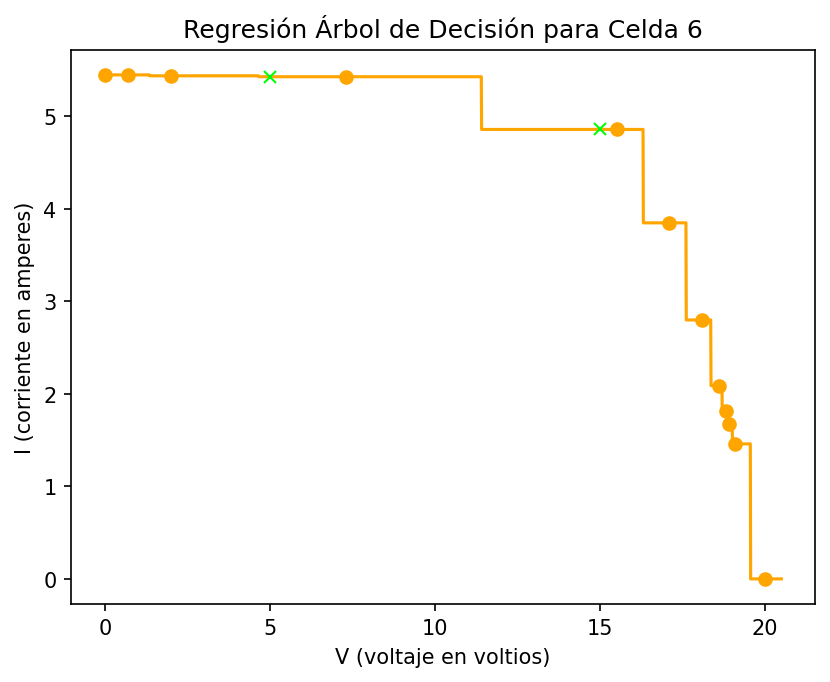







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








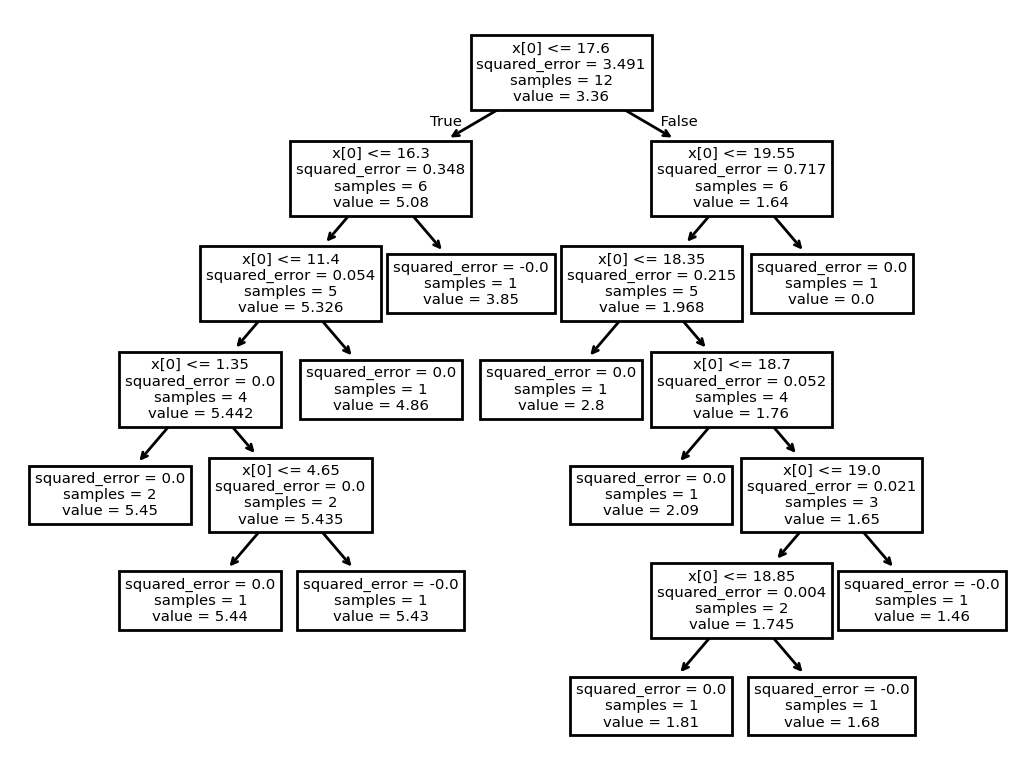

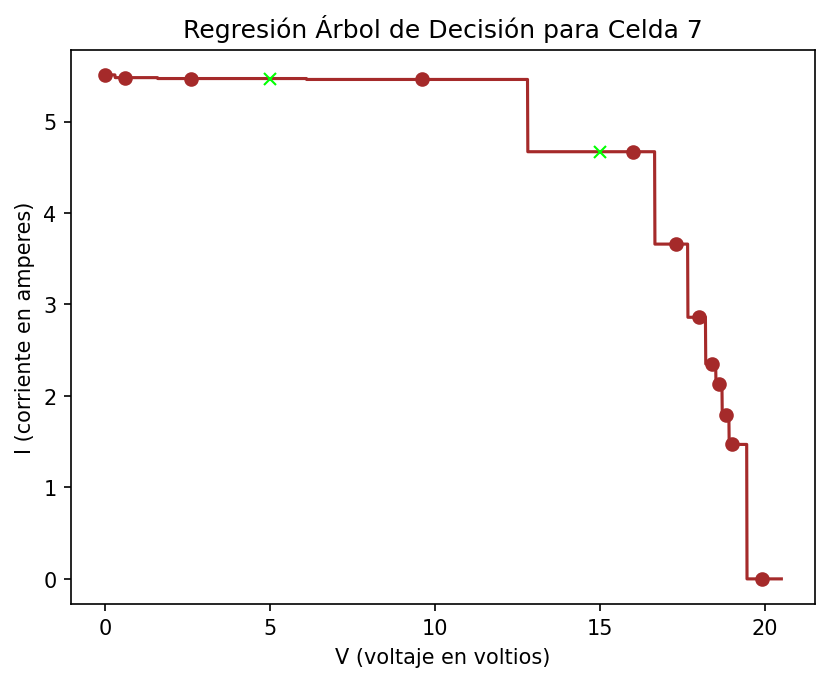







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








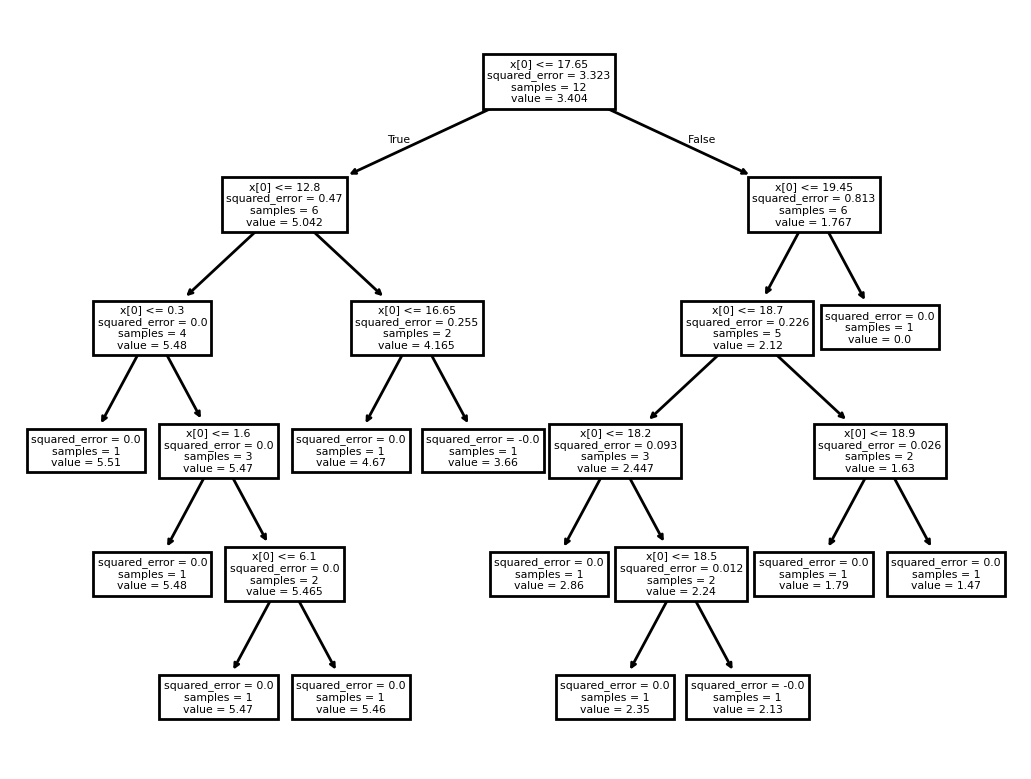

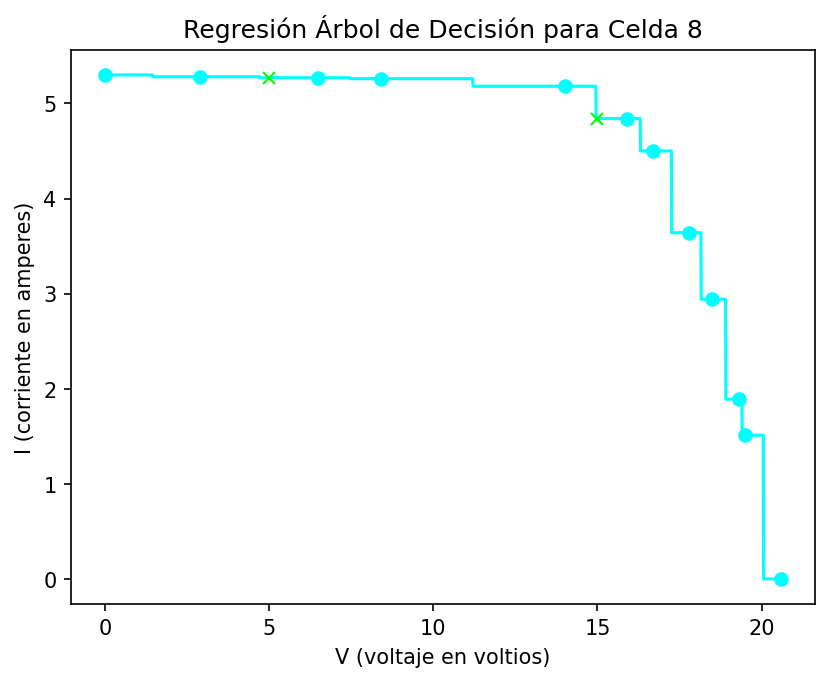







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








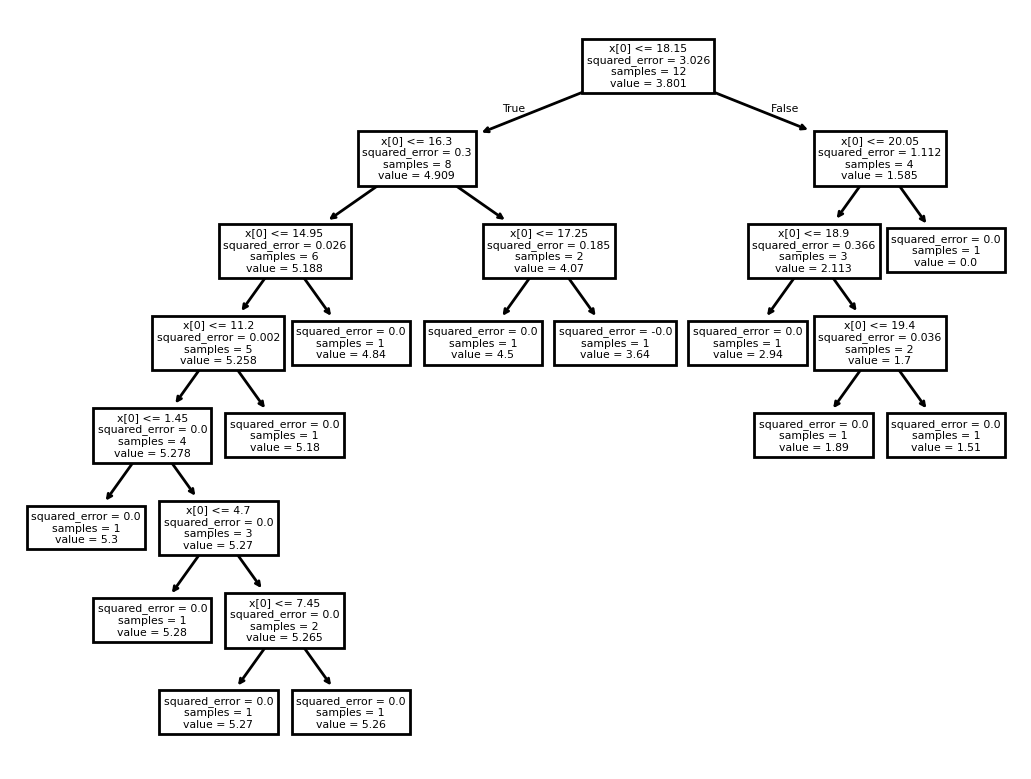

In [7]:
for i, color in enumerate(colores):
    regresion_arbol(data[f'Vcelda{i+1}'], data[f'Icelda{i+1}'], color, f'{i+1}')